In [1]:
import osmnx as ox
import pandas as pd
import geopandas as gdp

import numpy as np
import networkx as nx
import os
import sys
import pickle
import re


import seaborn as sns

import matplotlib.pyplot as plt


from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

 

prjDir = "/home/charles/Projects/QcMtlStreets"
sys.path.append(os.path.join(prjDir, "Python"))   
os.path.isdir(os.path.join(prjDir, "Python"))
from OsmnxElev import *

In [2]:
listNeigh = ["Saint-Jean-Baptiste", 
             "Vieux-Québec/Cap-Blanc/Colline parlementaire",
             "Saint-Roch",
            "Montcalm",
            "Saint-Sauveur"]
graphSJB, shpQcSJB, dfPointsSubsetQcSJB = getInducedSubgraphNeighQc(listNeigh)


# Get all edges
dfEdgesSJB = getAllListEdgesDirectedMultigraph(graphSJB,
                                                    listNeigh=listNeigh,
                                                    listFeat=['grade_abs', 'bearing'])

NameError: name 'loadGraphElevGradesNeighQc' is not defined

In [3]:
dfEdgesSJB.head()

startNode           startNeigh       endNode             endNeigh  \
0  1.832233e+09  Saint-Jean-Baptiste  1.832233e+09  Saint-Jean-Baptiste   
1  1.774756e+08  Saint-Jean-Baptiste  1.774762e+08  Saint-Jean-Baptiste   
2  1.774756e+08  Saint-Jean-Baptiste  1.652178e+08  Saint-Jean-Baptiste   
3  1.774756e+08  Saint-Jean-Baptiste  3.048305e+08  Saint-Jean-Baptiste   
4  1.832233e+09  Saint-Jean-Baptiste  2.477819e+09  Saint-Jean-Baptiste   

   grade_abs  bearing  startIdx  endIdx pairIdxDirected pairIdxUndirected  \
0     0.1264  350.087         1       1          (1, 1)            (1, 1)   
1     0.0324  328.701         1       1          (1, 1)            (1, 1)   
2     0.0303   58.025         1       1          (1, 1)            (1, 1)   
3     0.0296  238.391         1       1          (1, 1)            (1, 1)   
4     0.2838   15.665         1       1          (1, 1)            (1, 1)   

                          neighPairUndirected  \
0  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)   
1  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)   
2  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)   
3  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)   
4  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)   

                            neighPairDirected  
0  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)  
1  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)  
2  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)  
3  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)  
4  (Saint-Jean-Baptiste, Saint-Jean-Baptiste)

In [4]:
dfEdgesSJB.neighPairUndirected.unique()

array([('Saint-Jean-Baptiste', 'Saint-Jean-Baptiste'),
       ('Saint-Jean-Baptiste', 'Vieux-Québec/Cap-Blanc/Colline parlementaire'),
       ('Saint-Jean-Baptiste', 'Saint-Roch'),
       ('Montcalm', 'Saint-Jean-Baptiste'),
       ('Vieux-Québec/Cap-Blanc/Colline parlementaire', 'Vieux-Québec/Cap-Blanc/Colline parlementaire'),
       ('Saint-Roch', 'Vieux-Québec/Cap-Blanc/Colline parlementaire'),
       ('Montcalm', 'Vieux-Québec/Cap-Blanc/Colline parlementaire'),
       ('Saint-Roch', 'Saint-Roch'), ('Montcalm', 'Saint-Roch'),
       ('Saint-Roch', 'Saint-Sauveur'), ('Montcalm', 'Montcalm'),
       ('Montcalm', 'Saint-Sauveur'), ('Saint-Sauveur', 'Saint-Sauveur')],
      dtype=object)

In plotBearingVsGrade, considering the following pair of neighbourhoods in grade vs bearing plot  ('Saint-Jean-Baptiste', 'Saint-Jean-Baptiste')  using  30  buckets
No bucketBearings using  30  buckets of size 2pi/ 30
Here are the grade buckets considered:  [0.      0.0035  0.0074  0.0122  0.0181  0.0251  0.0341  0.0481  0.0697
 0.10889 2.2105 ]
Filtering on pair of neighbourhoods:  ('Saint-Jean-Baptiste', 'Saint-Jean-Baptiste')
Here is the count for  (-0.0001, 0.0074]  :  [ 0  1  0  2 18  5  2  0  1  0  0  3  1  0  0  0  1  0  2 18  4  1  0  1
  0  0  3  0  0  0]
Here is the count for  (0.0074, 0.0697]  :  [ 2  6  2 14 84 26  7 11  5  4  3 31 17 19  3  3  6  2 24 90 22  5  9  5
  4  2 30 20 19  3]
Here is the count for  (0.0697, 2.211]  :  [ 5  2  2  4 19  5  3  3  0  3  2 30 40 19  5  4  2  1  3 10  4  2  3  0
  3  1 15 36 22  6]
Fatal error, the sum of counts over each edge grade does not add up to total sum of edges: 
 [  7   9   4  20 121  36  12  14   6   7   5  64  58  38   8   

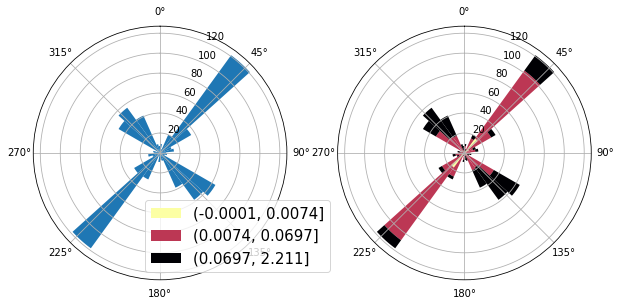

In [5]:
fig=plotBearingVsGrade(dfEdgesSJB, 
                   neighPairUndirected=('Saint-Jean-Baptiste', 'Saint-Jean-Baptiste'))

p=fig.get_figure()
p.savefig(os.path.join(ROOT_DIR,"Figures","EdgeGrades","qcSJBGradesVsBearingsPolarHist.png"))

In plotBearingVsGrade, considering the following pair of neighbourhoods in grade vs bearing plot  ('Vieux-Québec/Cap-Blanc/Colline parlementaire', 'Vieux-Québec/Cap-Blanc/Colline parlementaire')  using  30  buckets
No bucketBearings using  30  buckets of size 2pi/ 30
Here are the grade buckets considered:  [0.      0.0035  0.0074  0.0122  0.0181  0.0251  0.0341  0.0481  0.0697
 0.10889 2.2105 ]
Filtering on pair of neighbourhoods:  ('Vieux-Québec/Cap-Blanc/Colline parlementaire', 'Vieux-Québec/Cap-Blanc/Colline parlementaire')
Here is the count for  (-0.0001, 0.0074]  :  [62 26 17 40 90 53 65 43 49 30 23 39 21 41 42 58 22 17 39 88 50 61 40 48
 30 23 39 21 40 43]
Here is the count for  (0.0074, 0.0697]  :  [192 108  98 169 300 186 182 118 140 100  99 203 135 164 142 180 103 103
 145 307 167 169 115 132  96  99 203 128 162 138]
Here is the count for  (0.0697, 2.211]  :  [107  55  77  82 104  83  63  64  48  48  37  73  98  82  68  99  54  76
  74 105  75  60  58  45  46  34  81 102  75  

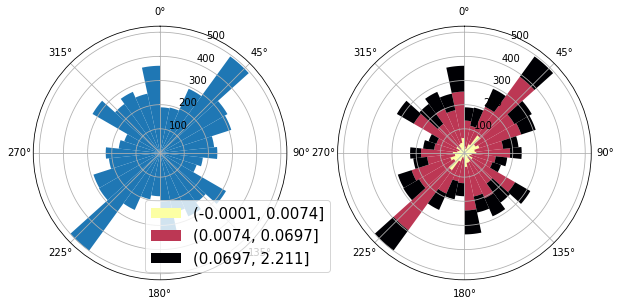

In [6]:
fig=plotBearingVsGrade(dfEdgesSJB, 
                   neighPairUndirected=('Vieux-Québec/Cap-Blanc/Colline parlementaire', 'Vieux-Québec/Cap-Blanc/Colline parlementaire'))

p=fig.get_figure()
p.savefig(os.path.join(ROOT_DIR,"Figures","EdgeGrades","qcVieuxQcGradesVsBearingsPolarHist.png"))

In plotBearingVsGrade, considering the following pair of neighbourhoods in grade vs bearing plot  ('Saint-Roch', 'Saint-Roch')  using  30  buckets
No bucketBearings using  30  buckets of size 2pi/ 30
Here are the grade buckets considered:  [0.      0.0035  0.0074  0.0122  0.0181  0.0251  0.0341  0.0481  0.0697
 0.10889 2.2105 ]
Filtering on pair of neighbourhoods:  ('Saint-Roch', 'Saint-Roch')
Here is the count for  (-0.0001, 0.0074]  :  [19 26 23 16 24 75 38 38 38 37 40 26 42 33 26 20 26 27 18 25 66 39 37 44
 37 33 26 36 37 22]
Here is the count for  (0.0074, 0.0697]  :  [ 60  67  63  44  79 182  86  75  83  63  83  79 151  92  74  67  75  62
  42  68 178  80  74  89  61  83  68 160  98  62]
Here is the count for  (0.0697, 2.211]  :  [15 12  8 10 18 19 23  8 12 11 11 10 45 27  9 14 12  8  9 14 22 17  7 12
 10 10  9 44 26  8]
Fatal error, the sum of counts over each edge grade does not add up to total sum of edges: 
 [ 94 105  94  70 121 276 147 121 133 111 134 115 238 152 109 101 113 

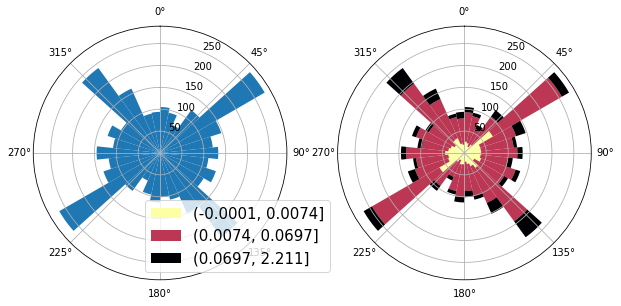

In [7]:
fig=plotBearingVsGrade(dfEdgesSJB, 
                   neighPairUndirected=('Saint-Roch', 'Saint-Roch'))

p=fig.get_figure()
p.savefig(os.path.join(ROOT_DIR,"Figures","EdgeGrades","qcSaintRochGradesVsBearingsPolarHist.png"))

In plotBearingVsGrade, considering the following pair of neighbourhoods in grade vs bearing plot  ('Saint-Jean-Baptiste', 'Saint-Roch')  using  30  buckets
No bucketBearings using  30  buckets of size 2pi/ 30
Here are the grade buckets considered:  [0.      0.0035  0.0074  0.0122  0.0181  0.0251  0.0341  0.0481  0.0697
 0.10889 2.2105 ]
Filtering on pair of neighbourhoods:  ('Saint-Jean-Baptiste', 'Saint-Roch')
Here is the count for  (-0.0001, 0.0074]  :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Here is the count for  (0.0074, 0.0697]  :  [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
Here is the count for  (0.0697, 2.211]  :  [1 0 0 0 2 0 0 1 0 0 0 1 2 1 0 1 0 0 0 2 0 0 1 0 0 0 0 1 1 0]
Fatal error, the sum of counts over each edge grade does not add up to total sum of edges: 
 [1 0 0 0 2 0 0 1 1 0 0 1 2 1 0 1 0 0 0 2 0 0 1 1 0 0 0 1 1 0]  vs  [[1 0 0 0 2 0 0 1 1 0 0 1 2 1 0 1 0 0 0 2 0 0 1 1 0 0 0 1 1 0]
 [1 0 0 0 2 0 0 1 1 0 0 1 2 1 0 1 0 0 0 2 0 

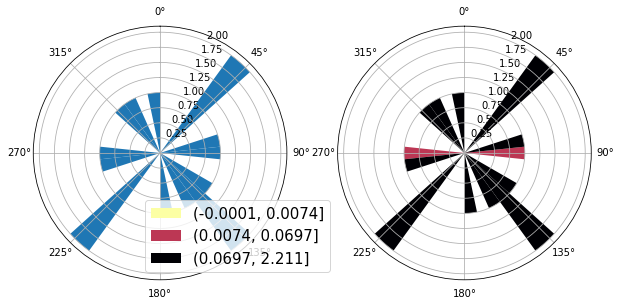

In [8]:
fig=plotBearingVsGrade(dfEdgesSJB, 
                   neighPairUndirected=( 'Saint-Jean-Baptiste', 'Saint-Roch'))

p=fig.get_figure()
p.savefig(os.path.join(ROOT_DIR,"Figures","EdgeGrades","qcSJB_SaintRochGradesVsBearingsPolarHist.png"))

File exists => reading graph
There are  0.049957388093015705  of points in the bounding box in neighbourhoods Saint-Jean-Baptiste, Saint-Roch
Using absolute grades


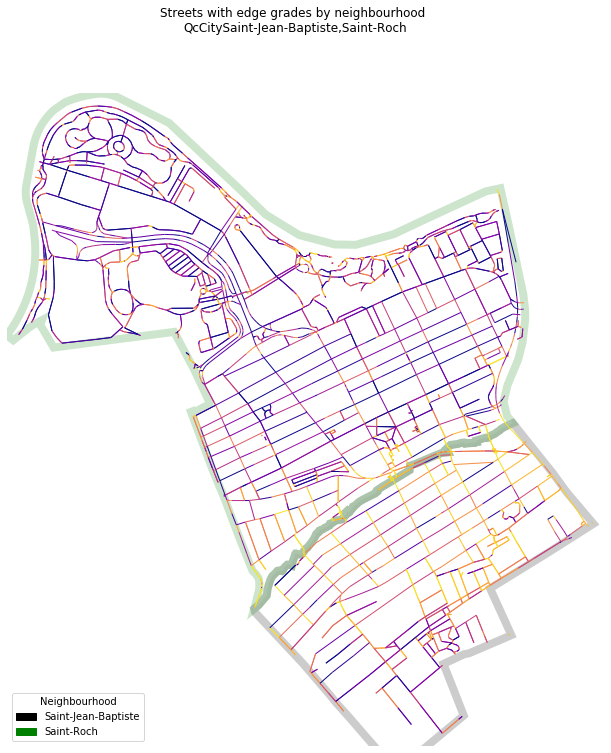

In [9]:
fig,ax=plotGraphGradeNeighQc(["Saint-Jean-Baptiste","Saint-Roch"])
fig.savefig(os.path.join(ROOT_DIR,"Figures","EdgeGrades","GraphWithEdgesAndNeighbourhoodsQcCitySJBSaintRoch.png"))

In plotBearingVsGrade, considering the following pair of neighbourhoods in grade vs bearing plot  ('Montcalm', 'Montcalm')  using  30  buckets
No bucketBearings using  30  buckets of size 2pi/ 30
Here are the grade buckets considered:  [0.      0.0035  0.0074  0.0122  0.0181  0.0251  0.0341  0.0481  0.0697
 0.10889 2.2105 ]
Filtering on pair of neighbourhoods:  ('Montcalm', 'Montcalm')
Here is the count for  (-0.0001, 0.0074]  :  [16  6  6 18 75 13 12  9 12 10 10 45  8  8 10 16  7  7 18 75 12 14 10 15
  8 10 46  8  7 10]
Here is the count for  (0.0074, 0.0697]  :  [ 45  36  44  58 217  68  50  39  24  23  32 182  26  26  36  44  37  43
  57 224  75  50  43  26  22  31 182  27  24  35]
Here is the count for  (0.0697, 2.211]  :  [12 11  8 16 22  5 11 22 15 14 24 90 12 25 20 13 12  9 16 22  5 12 22 15
 15 24 90 12 25 19]
Fatal error, the sum of counts over each edge grade does not add up to total sum of edges: 
 [ 73  53  58  92 314  86  73  70  51  47  66 317  46  59  66  73  56  59
  91

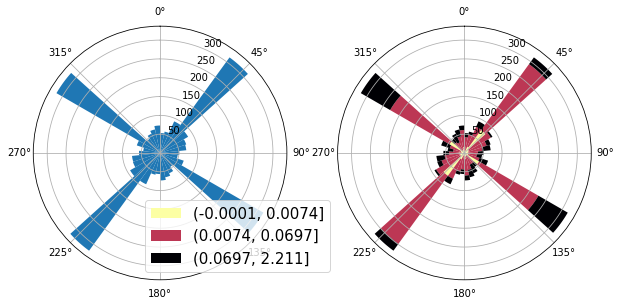

In [10]:
fig=plotBearingVsGrade(dfEdgesSJB, 
                   neighPairUndirected=('Montcalm', 'Montcalm'))

p=fig.get_figure()
p.savefig(os.path.join(ROOT_DIR,"Figures","EdgeGrades","qcMontcalmGradesVsBearingsPolarHist.png"))

In plotBearingVsGrade, considering the following pair of neighbourhoods in grade vs bearing plot  ('Saint-Sauveur', 'Saint-Sauveur')  using  30  buckets
No bucketBearings using  30  buckets of size 2pi/ 30
Here are the grade buckets considered:  [0.      0.0035  0.0074  0.0122  0.0181  0.0251  0.0341  0.0481  0.0697
 0.10889 2.2105 ]
Filtering on pair of neighbourhoods:  ('Saint-Sauveur', 'Saint-Sauveur')
Here is the count for  (-0.0001, 0.0074]  :  [ 14  17  14  31 124  65  56  26  29  16  13  72  25   8  14  15  17  15
  29 148  66  60  32  30  14  13  68  23   8  14]
Here is the count for  (0.0074, 0.0697]  :  [ 46  45  54  72 191  94  89  63  62  33  32 198  51  54  42  45  49  51
  81 174  95  87  66  60  34  25 198  52  42  43]
Here is the count for  (0.0697, 2.211]  :  [ 7  9  8 21 20 16 10 14 11  7 15 38 11 10  6  8 13 10 23 17 17  8 13 13
  7 15 43  7  5  5]
Fatal error, the sum of counts over each edge grade does not add up to total sum of edges: 
 [ 67  71  76 124 335 175 15

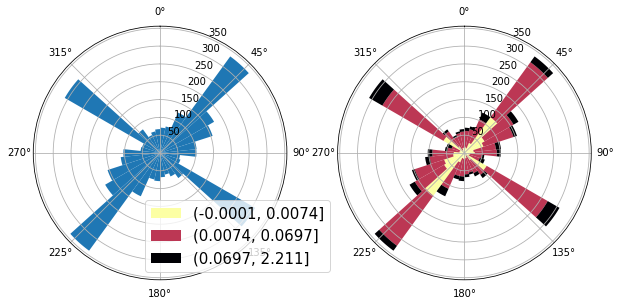

In [11]:
fig=plotBearingVsGrade(dfEdgesSJB, 
                   neighPairUndirected=('Saint-Sauveur', 'Saint-Sauveur'))

p=fig.get_figure()
p.savefig(os.path.join(ROOT_DIR,"Figures","EdgeGrades","qcSaintSauveurGradesVsBearingsPolarHist.png"))

In plotBearingVsGrade, considering the following pair of neighbourhoods in grade vs bearing plot  ('Montcalm', 'Saint-Sauveur')  using  30  buckets
No bucketBearings using  30  buckets of size 2pi/ 30
Here are the grade buckets considered:  [0.      0.0035  0.0074  0.0122  0.0181  0.0251  0.0341  0.0481  0.0697
 0.10889 2.2105 ]
Filtering on pair of neighbourhoods:  ('Montcalm', 'Saint-Sauveur')
Here is the count for  (-0.0001, 0.0074]  :  [0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
Here is the count for  (0.0074, 0.0697]  :  [0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0]
Here is the count for  (0.0697, 2.211]  :  [0 0 0 1 0 0 0 1 0 0 0 3 0 0 0 0 0 0 1 0 0 0 1 0 0 0 3 0 0 0]
Fatal error, the sum of counts over each edge grade does not add up to total sum of edges: 
 [0 1 0 2 1 2 2 1 0 0 0 3 0 0 0 0 1 0 2 1 2 2 1 0 0 0 3 0 0 0]  vs  [[0 1 0 2 1 2 2 1 0 0 0 3 0 0 0 0 1 0 2 1 2 2 1 0 0 0 3 0 0 0]
 [0 1 0 2 1 2 2 1 0 0 0 3 0 0 0 0 1 0 2 1 2 2 1 0 0 0 3 0 0 

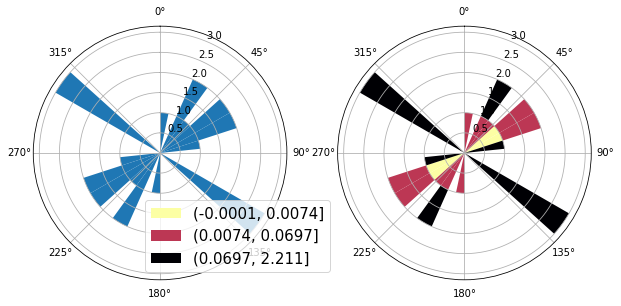

In [12]:
fig=plotBearingVsGrade(dfEdgesSJB, 
                   neighPairUndirected=('Montcalm', 'Saint-Sauveur'))

p=fig.get_figure()
p.savefig(os.path.join(ROOT_DIR,"Figures","EdgeGrades","qcSaintSauveurMontcalmGradesVsBearingsPolarHist.png"))

File exists => reading graph
There are  0.07430704922689826  of points in the bounding box in neighbourhoods Montcalm, Saint-Sauveur
Using absolute grades


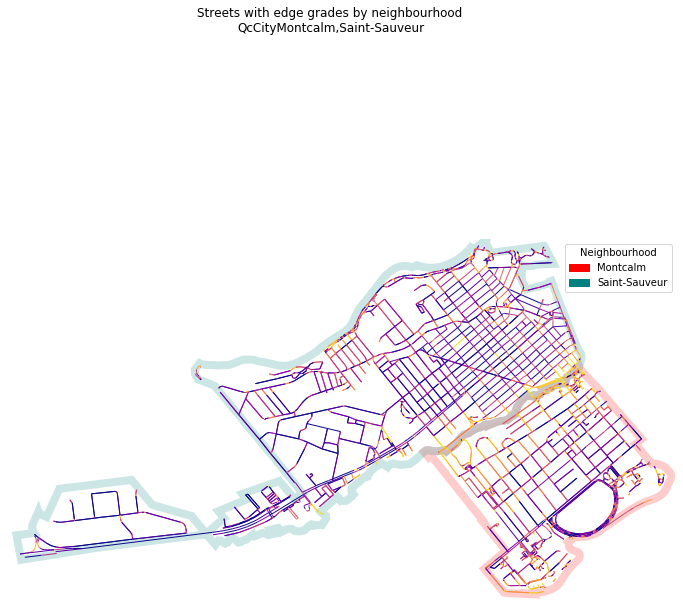

In [13]:
fig,ax=plotGraphGradeNeighQc(["Montcalm","Saint-Sauveur"])
fig.savefig(os.path.join(ROOT_DIR,"Figures","EdgeGrades","GraphWithEdgesAndNeighbourhoodsQcCityMontcalmSaintSauveur.png"))

In plotBearingVsGrade, considering the following pair of neighbourhoods in grade vs bearing plot  ('Saint-Roch', 'Saint-Sauveur')  using  30  buckets
No bucketBearings using  30  buckets of size 2pi/ 30
Here are the grade buckets considered:  [0.      0.0035  0.0074  0.0122  0.0181  0.0251  0.0341  0.0481  0.0697
 0.10889 2.2105 ]
Filtering on pair of neighbourhoods:  ('Saint-Roch', 'Saint-Sauveur')
Here is the count for  (-0.0001, 0.0074]  :  [0 0 1 2 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0]
Here is the count for  (0.0074, 0.0697]  :  [0 0 3 1 1 3 1 0 0 1 1 0 0 2 0 0 0 3 1 1 5 2 1 0 1 1 0 0 2 0]
Here is the count for  (0.0697, 2.211]  :  [1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0]
Fatal error, the sum of counts over each edge grade does not add up to total sum of edges: 
 [1 0 4 3 2 3 1 1 2 1 3 0 0 2 0 1 0 4 1 2 6 2 2 0 1 3 0 0 2 0]  vs  [[1 0 4 3 2 3 1 1 2 1 3 0 0 2 0 1 0 4 1 2 6 2 2 0 1 3 0 0 2 0]
 [1 0 4 3 2 3 1 1 2 1 3 0 0 2 0 1 0 4 1 2 6 2 2 0 1 3 0 

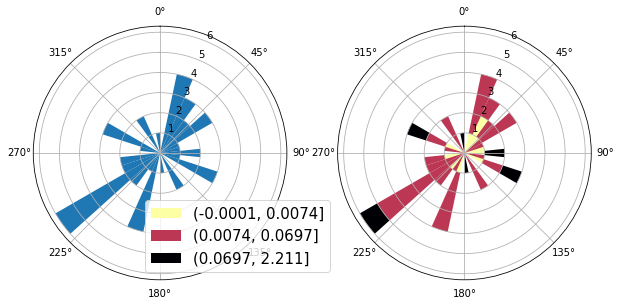

In [14]:
fig=plotBearingVsGrade(dfEdgesSJB, 
                   neighPairUndirected=('Saint-Roch', 'Saint-Sauveur'))

p=fig.get_figure()
p.savefig(os.path.join(ROOT_DIR,"Figures","EdgeGrades","qcSaintRochSaintSauveurGradesVsBearingsPolarHist.png"))

In plotBearingVsGrade, considering the following pair of neighbourhoods in grade vs bearing plot  ('Montcalm', 'Saint-Jean-Baptiste')  using  30  buckets
No bucketBearings using  30  buckets of size 2pi/ 30
Here are the grade buckets considered:  [0.      0.0035  0.0074  0.0122  0.0181  0.0251  0.0341  0.0481  0.0697
 0.10889 2.2105 ]
Filtering on pair of neighbourhoods:  ('Montcalm', 'Saint-Jean-Baptiste')
Here is the count for  (-0.0001, 0.0074]  :  [0 0 0 1 2 0 0 0 0 0 0 1 0 0 0 0 0 0 1 2 0 0 0 0 0 0 1 0 0 0]
Here is the count for  (0.0074, 0.0697]  :  [0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0]
Here is the count for  (0.0697, 2.211]  :  [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]
Fatal error, the sum of counts over each edge grade does not add up to total sum of edges: 
 [0 0 0 2 3 0 0 0 0 0 0 4 0 0 0 0 0 0 2 4 0 0 0 0 0 0 4 0 0 0]  vs  [[0 0 0 2 3 0 0 0 0 0 0 4 0 0 0 0 0 0 2 4 0 0 0 0 0 0 4 0 0 0]
 [0 0 0 2 3 0 0 0 0 0 0 4 0 0 0 0 0 0 2 4 0 0 0 

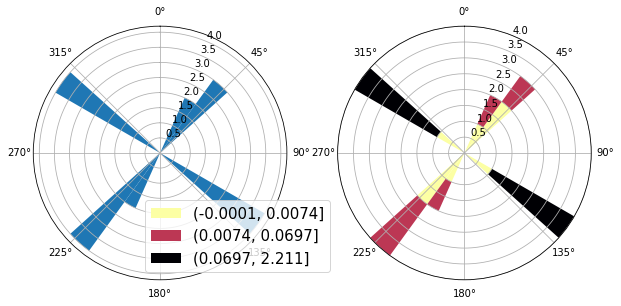

In [15]:
fig=plotBearingVsGrade(dfEdgesSJB, 
                   neighPairUndirected=('Montcalm', 'Saint-Jean-Baptiste'))

p=fig.get_figure()
p.savefig(os.path.join(ROOT_DIR,"Figures","EdgeGrades","qcSJBMontcalmGradesVsBearingsPolarHist.png"))

File exists => reading graph
There are  0.03850290166795179  of points in the bounding box in neighbourhoods Montcalm, Saint-Jean-Baptiste
Using absolute grades


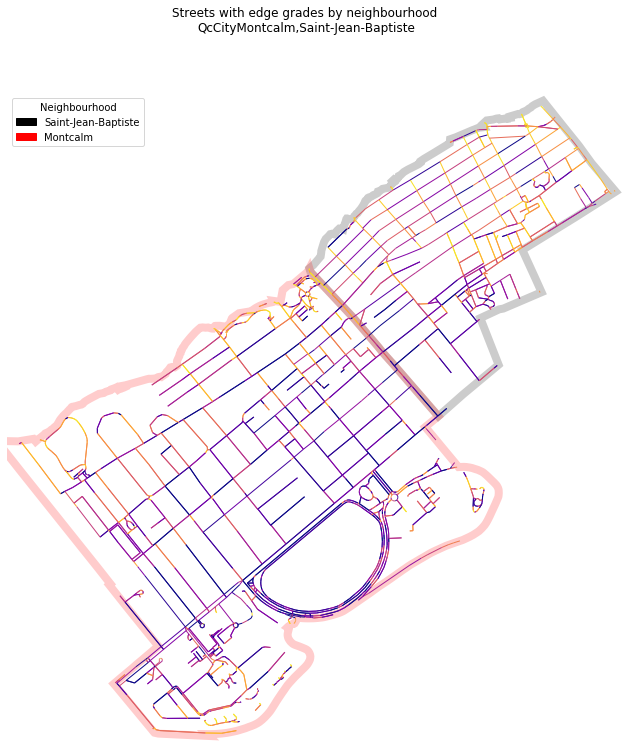

In [16]:
fig,ax =plotGraphGradeNeighQc(['Montcalm','Saint-Jean-Baptiste'])
fig.savefig(os.path.join(ROOT_DIR,"Figures","EdgeGrades","GraphWithEdgesAndNeighbourhoodsQcCityMontcalmSJB.png"))

In [17]:
#For comparisons purposes

In [18]:
import numpy as np
np.zeros(8,dtype="int")

array([0, 0, 0, 0, 0, 0, 0, 0])

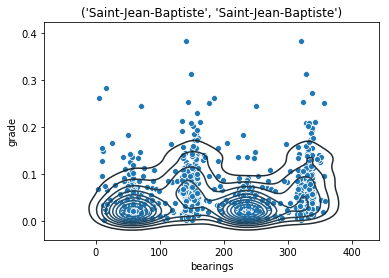

In [19]:
plot=plotKDEScatterBearingVsGrade(dfEdgesSJB,("Saint-Jean-Baptiste", "Saint-Jean-Baptiste"))
p=plot.get_figure()
p.savefig(os.path.join(ROOT_DIR,"Figures","EdgeGrades", "qcSJBGradesVsBearingsScatter.png"))

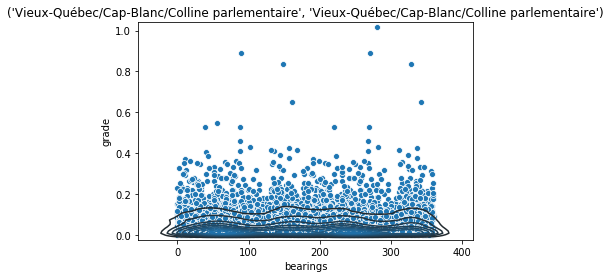

In [20]:
plot=plotKDEScatterBearingVsGrade(dfEdgesSJB,('Vieux-Québec/Cap-Blanc/Colline parlementaire', 'Vieux-Québec/Cap-Blanc/Colline parlementaire'))
p=plot.get_figure()
p.savefig(os.path.join(ROOT_DIR,"Figures","EdgeGrades", "qcVieuxQcGradesVsBearingsScatter.png"))

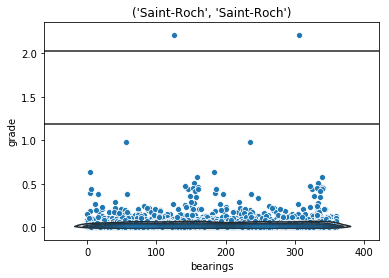

In [21]:
plotKDEScatterBearingVsGrade(dfEdgesSJB,('Saint-Roch', 'Saint-Roch'))
p=plot.get_figure()
p.savefig(os.path.join(ROOT_DIR,"Figures","EdgeGrades", "qcSaintRochGradesVsBearingsScatter.png"))

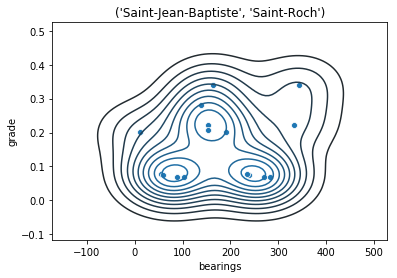

In [22]:
plot=plotKDEScatterBearingVsGrade(dfEdgesSJB,('Saint-Jean-Baptiste', 'Saint-Roch'))
p=plot.get_figure()
p.savefig(os.path.join(ROOT_DIR,"Figures","EdgeGrades", "qcSJB_SaintRochGradesVsBearingsScatter.png"))

In [23]:
#Tests/debugging

In [24]:
[[0] * (8-1)] * 3

[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]

In [25]:
tupleGradeBuckets=["1","2","3"]
bucketBearings=[360*ang/(30) for ang in range(30+1)] #split 360 degrees in buckets of size n=30 - 31 endpoints

bucketBearings
len(bucketBearings)

31

In [26]:
vals= np.random.uniform(min(bucketBearings),max(bucketBearings),100 )  
counts, div = np.histogram(vals,  bins=bucketBearings)
print(vals, counts, div)

[  3.94953926  11.71482202 237.16174952 326.898482   273.88611369
 339.43794229  28.38325738 123.91143839 339.35321956  73.36376698
 132.78713206  76.28213297 232.15506553 159.20398267 162.58861994
 354.94726954  86.28529575 298.1141091  220.18411287  89.79292998
  87.09550493 158.00946823 318.89824421 267.44061889 297.62932457
 245.58897812  57.38415209 145.78042421  13.13726493 106.89577489
 109.91631036  95.88616594 333.17655331 219.04198294 339.74615627
 229.04176802 248.31028876  41.51604561 129.37917446 185.63575557
 143.1105403  336.85573371  81.73341811  84.43520245 233.72446002
 262.54781148 175.76282542 153.66711161   7.36602396 248.68472985
  55.81636419 239.22832348 116.21582567  13.04897198  47.45414301
 190.46924501 314.8015602  195.33741904 224.44488229 344.86881488
 231.72312002  39.03831647 317.61467957 250.66400708  50.10587323
 354.45481537 300.63501999 157.64647198 112.73518974  68.13043937
 145.64395387 239.95375359 208.18034893  11.21452031  17.1337046
 171.023881

In [27]:
#plt.bar([1,2,3], height=np.ones(3), color=cols)

In [28]:
#plt.bar([1], height=np.ones(1), color=cols[0])


In [29]:
countsA=[ [0] * 30] *3
bottomA=[ [0] * 30] *3
bottomA[0] + np.random.rand(30)

array([0.50498283, 0.16338232, 0.92294371, 0.34857309, 0.56861996,
       0.33348705, 0.63576231, 0.88888653, 0.70109084, 0.04080192,
       0.72571033, 0.45678217, 0.39202456, 0.87596027, 0.23042509,
       0.08866024, 0.37074455, 0.92915154, 0.69069602, 0.35189185,
       0.97401644, 0.51690584, 0.43273263, 0.64523517, 0.20210587,
       0.34169902, 0.73957317, 0.8998581 , 0.50280158, 0.73153611])

NameError: name 'bottomSum' is not defined

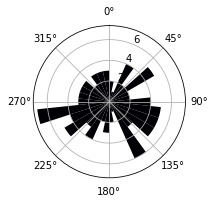

In [30]:
width = 2 * np.pi / 30 #width is 2pi divided by number of bars
ax = plt.subplot(121, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
countsTotal=np.zeros(30)

vals=np.random.uniform(min(bucketBearings),max(bucketBearings),100 )  
counts, div = np.histogram(vals,  bins=bucketBearings)
countsTotal+=counts
countsA[0]=counts

div=div[0:-1]
cols=[ plt.cm.get_cmap("inferno",3)(i) for i in range(len(counts)) ]

 
#div * np.pi * 2 / 360 is division in radians
#remove half width to get to center of bar
bars = ax.bar(div * np.pi * 2 / 360 - width * 0.5, 
                      height=counts,
                      width=width,
                      bottom=bottomA[0],
                      color=cols[0],
                      label=tupleGradeBuckets[0] 
             )
vals=np.random.uniform(min(bucketBearings),max(bucketBearings),100 )  
counts, div = np.histogram(vals,  bins=bucketBearings)
countsTotal+=counts
bottomSum+= counts
countsA[1]=counts
bottomA[1] = bottomA[0]+countsA[0]

div=div[0:-1]
bars = ax.bar(div * np.pi * 2 / 360 - width * 0.5,
                      height=counts,
                      width=width,
                      bottom=bottomA[1] ,
                      color=cols[1],
                      label=tupleGradeBuckets[1])

vals=np.random.uniform(min(bucketBearings),max(bucketBearings),100 )  
counts, div = np.histogram(vals,  bins=bucketBearings)
countsTotal+=counts
bottomSum+= counts
countsA[2]=counts
bottomA[2] = bottomA[1]+countsA[1]

div=div[0:-1]
bars = ax.bar(div * np.pi * 2 / 360 - width * 0.5,
                      height=counts,
                      width=width,
                      bottom=bottomA[2] ,
                      color=cols[2],
                      label=tupleGradeBuckets[2])

frame = plt.gcf()
frame.set_size_inches(20, 11)

ax.set_yticks([i for i in range(max(bottomA[2]+countsA[2]))])
#ax.set_yticklabels(years, rotation=65)

#Don't forget the legend (with larger text size)
plt.legend(np.unique(tupleGradeBuckets),
               loc='lower right', bbox_to_anchor=(0, 0., 0, 0),
               prop={'size': 15})

plt.show()



In [ ]:
dfTally=pd.DataFrame(
    {"angleDegrees": div ,
                     "count" : countsTotal,
                     "bottoms0":bottomA[0],
                      "bottoms1":bottomA[1],
                      "bottoms2":bottomA[2],
                     "count0":countsA[0],
                     "count1":countsA[1],
                     "count2":countsA[2]
                     }
                    )
dfTally

In [ ]:
N=20
radii = 10 * np.random.rand(N)
radii

In [ ]:
width = np.pi / 4 * np.random.rand(N)
width

In [ ]:
colors = plt.cm.viridis(radii / 10.)
colors